## 선형 판별 분석을 통한 지도 방식의 데이터 압축

* 선형 판별 분석(Linear Discriminant Analysis, LDA) : 규제가 없는 모델에서 차원의 저주로 인한 과대 적합 정도를 줄이고 계산 효율성을 높이기 위한 특성 추출의 기법으로 사용할 수 있다. PCA와 유사하며 LDA 목표는 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾는 것이다.

### 주성분 분석 vs 선형 판별 분석

* PCA는 비지도학습 알고리즘, 선형 판별 분석은 지도학습 알고리즘이다.

![텍스트](http://i.imgur.com/6ggd2F0.png)
* LDA는 위 그림처럼 데이터를 특정 한 축에 사영(projection)한 후에 두 범주를 잘 구분할 수 있는 직선을 찾는 걸 목표로 합니다. 모델 이름에 linear라는 이름이 붙은 이유이기도 합니다.
* LDA는 데이터가 정규 분포라고 가정합니다. 또 클래스가 동일한 공분산 행렬을 가지고 샘플은 서로 통계적으로 독립적이라고 가정합니다. 하나 이상의 가정이 위반되더라도 여전히 LDA는 차원 축소를 상당히 잘 수행합니다.

### 선형 판별 분석의 내부 동작 방식

* LDA 수행에 필요한 주요 단계
    * d 차원의 데이터셋을 표준화 전처리한다
    * 각 클래스에 대해 d 차원의 평균 벡터를 계산한다
    * 클래스 간의 산포 행렬 $S_B$와 클래스 내 산포 행렬 $S_w$를 구성한다
    * $S_w^{-1}S_B$행렬의 고유 벡터와 고유값을 계산한다
    * 고유값을 내림차순으로 정렬하여 고유 벡터의 순서를 매긴다
    * 고유값이 가장 큰 k개의 고유 벡터를 선택하여 d X K차원의 변환 행렬 W를 구성한다. 이 행렬의 열이 고유 벡터이다
    * 변환 행렬 W를 사용하여 샘플을 새로운 특성 부분 공간으로 투영한다
    
### 산포 행렬 계산

* 평균 벡터를 사용하여 클래스 간의 산포 행렬과 클래스 내 산포 행렬을 구성한다. 평균 벡터 $m_i$는 클래스 $ i$의 샘플에 대한 특성의 평균값 $\mu_m$을 저장한다.
$$ m_i = \frac{1}{n_i}\sum\limits_{x\in{D_i}}^{c}x_m $$
$$ m_i = \begin{bmatrix} \mu_i,alcohol \\\\
\mu_i,malic acid \\\\
\mu_i,proline \end{bmatrix} i\in{\{1,2,3\}} $$

In [2]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                     'ml/machine-learning-databases/'
                     'wine/wine.data', header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [5]:
import numpy as np

np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis = 0))
    print('MV',label,':\n',mean_vecs[label-1])

MV 1 :
 [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]
MV 2 :
 [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]
MV 3 :
 [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]


* 클래스 내 산포 행렬 계산
$$ S_W = \sum\limits_{i=1}^{c}S_i $$
$$ S_i = \sum\limits_{x\in{D_i}}^{c}(x-m_i)(x-m_i)^T $$

In [6]:
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row - mv).dot((row-mv).T)
    S_W += class_scatter
    
S_W

array([[ 5.0722e+01,  3.1007e+00, -7.9323e+00, -5.7848e+00, -2.8879e+00,
         7.8990e+00,  2.4543e+00,  9.3932e-01,  9.0781e-01,  1.5486e+01,
         7.0293e+00, -1.8659e+00,  4.9370e+00],
       [ 3.1007e+00,  9.0179e+01,  4.7074e+00,  1.4750e+01, -1.0900e+01,
        -8.8059e-02,  9.7797e-01,  8.4547e+00,  4.4732e+00, -1.4494e+01,
        -2.0361e+01,  3.5876e+00, -1.1176e+01],
       [-7.9323e+00,  4.7074e+00,  1.1189e+02,  7.0126e+01,  2.2213e+01,
         1.5505e+01,  1.4856e+01,  2.0454e+01, -2.3344e+00,  1.3787e+00,
         5.6585e+00,  8.1917e+00,  3.2570e-01],
       [-5.7848e+00,  1.4750e+01,  7.0126e+01,  9.2147e+01,  1.2485e+01,
         6.2091e+00,  6.2783e+00,  1.2735e+01, -4.7597e+00, -4.1511e+00,
         1.1779e+00,  1.1633e+01, -4.5296e+00],
       [-2.8879e+00, -1.0900e+01,  2.2213e+01,  1.2485e+01,  1.0605e+02,
         1.0950e+01,  5.2875e+00, -2.1136e+01,  1.3076e+01,  5.9930e+00,
         8.4568e+00, -5.3128e-01,  1.1845e+01],
       [ 7.8990e+00, -8.8059e-

In [7]:
print('클래스 레이블 분포 : %s'% np.bincount(y_train[1:]))

클래스 레이블 분포 : [ 0 41 50 32]


* 산포 행렬을 계산할 때 훈련 세트의 클래스 레이블이 균등하게 분포되어 있다고 가정한다. 하지만 이 가정이 틀렸다는 것을 알 수 있다.
* 산포 행렬을 클래스 샘플 개수로 나누면 사실 산포 행렬을 계산하는 것이 공분산 행렬을 계산하는 것과 같아진다. 즉, 공분산 행렬은 산포 행렬의 정규화 버전이다.

In [8]:
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T, bias=True)
    # bias = True이면 n으로 계산 False이면 n-1로 계산
    S_W += class_scatter
    
S_W  

array([[ 1.214 ,  0.0938, -0.1262, -0.1088, -0.0707,  0.2305,  0.0732,
         0.0226,  0.1054,  0.4144,  0.1384, -0.0159,  0.1194],
       [ 0.0938,  2.2089,  0.1137,  0.3432, -0.2559, -0.0445, -0.0171,
         0.2136,  0.0205, -0.3832, -0.4084,  0.077 , -0.2437],
       [-0.1262,  0.1137,  2.5417,  1.6054,  0.5236,  0.3845,  0.3122,
         0.4453, -0.0351,  0.0578,  0.1622,  0.1937, -0.0075],
       [-0.1088,  0.3432,  1.6054,  2.1096,  0.3167,  0.1494,  0.1198,
         0.2673, -0.0814, -0.0673,  0.0327,  0.2492, -0.117 ],
       [-0.0707, -0.2559,  0.5236,  0.3167,  2.3833,  0.2333,  0.1394,
        -0.5035,  0.2517,  0.141 ,  0.174 , -0.0057,  0.2455],
       [ 0.2305, -0.0445,  0.3845,  0.1494,  0.2333,  1.3198,  0.6274,
        -0.0788,  0.7452,  0.427 ,  0.0172,  0.426 ,  0.1516],
       [ 0.0732, -0.0171,  0.3122,  0.1198,  0.1394,  0.6274,  0.6814,
        -0.2522,  0.5632,  0.3752, -0.0395,  0.2477,  0.0728],
       [ 0.0226,  0.2136,  0.4453,  0.2673, -0.5035, -0.0788, 

* 클래스 간 산포 행렬 계산
$$ S_B = \sum\limits_{i=1}^{c}n_i(m_i-m)(m_i-m)^T $$
$$ (m은 전체평균) $$


In [9]:
mean_overall = np.mean(X_train_std, axis = 0)
mean_overall = mean_overall.reshape(d,1)
d = 13
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print(S_B)

[[ 73.2779   5.1521  29.3409 -37.8053  35.3288  27.8688  24.4037 -10.917
   11.9293  51.2816   0.2198  -0.3445  73.9711]
 [  5.1521  33.8209   5.5342  17.6688  -3.0595 -41.4067 -51.4514  32.9397
  -31.0444  36.0237 -47.4845 -53.4785 -18.4551]
 [ 29.3409   5.5342  12.1084 -13.0286  13.5707   6.6597   4.2554  -0.8742
    1.4687  23.8967  -4.84    -5.6837  27.1642]
 [-37.8053  17.6688 -13.0286  31.8532 -21.5944 -40.7237 -44.8903  26.1101
  -25.5242  -6.7623 -28.9705 -32.2968 -52.5343]
 [ 35.3288  -3.0595  13.5707 -21.5944  17.9512  20.621   20.5742 -10.8479
   11.0338  19.3529   7.9757   8.6902  39.5823]
 [ 27.8688 -41.4067   6.6597 -40.7237  20.621   66.8061  78.1916 -47.8401
   45.861  -22.5142  61.6487  69.1515  58.7931]
 [ 24.4037 -51.4514   4.2554 -44.8903  20.5742  78.1916  92.6119 -57.1978
   54.6364 -34.4354  75.5525  84.8261  62.2248]
 [-10.917   32.9397  -0.8742  26.1101 -10.8479 -47.8401 -57.1978  35.584
  -33.8973  25.0189 -47.8855 -53.8    -34.852 ]
 [ 11.9293 -31.0444   1.46

### 새로운 특성 부분 공간을 위해 선형 판별 벡터 선택

* LDA의 남은 단계는 PCA와 유사하다. 공분산 행렬에 대한 고유값 분해를 수행하는 대신 행렬 $S_W^{-1}S_B $ 의 고유값을 계산하면 된다

In [10]:
eigen_vals , eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs, key = lambda x : x[0], reverse = True)

print('내림차순의 고유값\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순의 고유값

358.0042070133658
177.07768640666217
2.842170943040401e-14
2.416464785473244e-14
2.1954926639581513e-14
2.1954926639581513e-14
2.0367938670394332e-14
2.0367938670394332e-14
1.8639642080179956e-14
1.4017013569391021e-14
1.4017013569391021e-14
3.5106142861573525e-15
2.728065685424338e-15


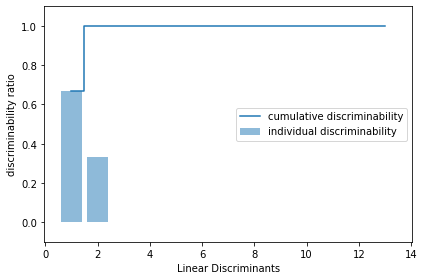

In [11]:
tot = sum(eigen_vals.real) # 실수부분
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

import matplotlib.pyplot as plt

plt.bar(range(1,14), discr, alpha =0.5, align='center',label='individual discriminability')
plt.step(range(1,14), cum_discr, where ='mid', label ='cumulative discriminability')

plt.ylabel('discriminability ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [12]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,
              eigen_pairs[1][1][:,np.newaxis].real))
print(w)

[[-0.1484 -0.4093]
 [ 0.091  -0.1583]
 [-0.0168 -0.3536]
 [ 0.1487  0.322 ]
 [-0.0165 -0.0813]
 [ 0.1912  0.0841]
 [-0.7333  0.2828]
 [-0.0751 -0.0099]
 [ 0.002   0.0902]
 [ 0.2953 -0.2168]
 [-0.0327  0.274 ]
 [-0.3539 -0.0133]
 [-0.3918 -0.5954]]


### 새로운 특성 공간으로 샘플 투영
* 이전 절과 같이 행렬 W를 훈련 세트에 곱해서 데이터를 변환할 수 있다.
$$ X' =XW $$

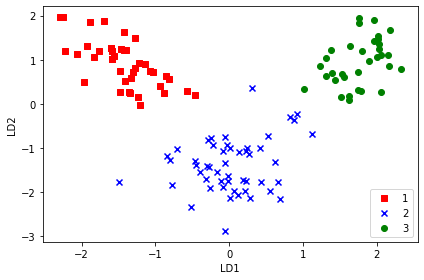

In [13]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
               X_train_lda[y_train==l, 1] * (-1),
               c=c , label = l, marker = m) # numpy 인덱싱 array[행조건문,열인덱스]
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

* PCA 결과와 비교
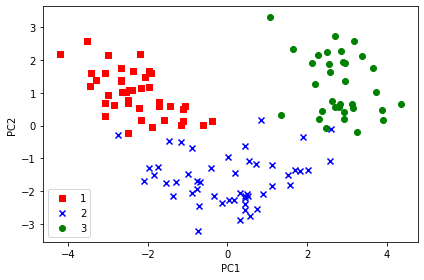

### 사이킷런의 LDA

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
x_train_lda = lda.fit_transform(X_train_std, y_train)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y==cl, 1],
                   alpha =0.8,
                   c = colors[idx],
                   marker = markers[idx],
                   label = cl,
                   edgecolor = 'black')

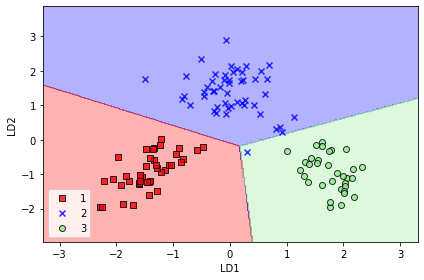

In [20]:
lr =LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda,y_train,classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

* 클래스 2의 샘플 하나를 제대로 분류하지 못했다. 규제 강도를 낮추어 로지스틱 회귀 모델이 훈련세트의 모든 샘플을 정확하게 분류하도록 결정 경계를 옮길 수 있지만 더 중요한 것은 테스트 세트의 결과이다.

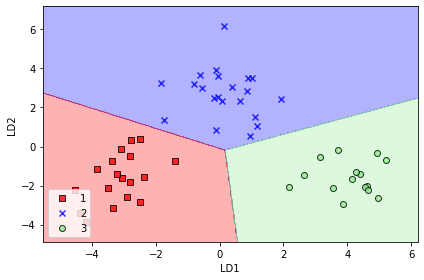

In [22]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(-X_test_lda, y_test, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()